In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #pythonhashseed 환경변수 설정
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')

light_df = pd.read_csv('./data/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
#공백으로 구분된 네 개의 비공백 문자열을 찾음

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
# 비교해보니 직접 동 별로 평균 계산 한 값과 동일했습니다
light_df = light_df.groupby(['도시', '구', '동']).mean().reset_index()
light_df.reset_index(inplace=True, drop=True)


child_area_df = pd.read_csv('./data/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')[['소재지지번주소']]
#중복된 값이 있으면 값이 겹칠 수 있으니 미리 중복 제거 
child_area_df['School Zone'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
child_area_df = child_area_df.groupby(['도시', '구', '동']).mean().reset_index()
child_area_df.reset_index(inplace=True, drop=True)


parking_df = pd.read_csv('./data/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

# Sum -> Mean으로 변경
parking_df = parking_df.groupby(['도시', '구', '동']).mean().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [2]:
train_org = pd.read_csv("./data/train.csv")
test_org = pd.read_csv("./data/test.csv")

countrywide_org = pd.read_csv('./data/external_open/countrywide_accident.csv')

display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [3]:
train_df = train_org.copy()
test_df = test_org.copy()
countrywide_df = countrywide_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
train_df = train_df.drop(columns=['사고일시'])


test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])


countrywide_df[['연', '월', '일', '시간']] = countrywide_org['사고일시'].str.extract(time_pattern)
countrywide_df[['연', '월', '일', '시간']] = countrywide_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
countrywide_df = countrywide_df.drop(columns=['사고일시'])


location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])


test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])


countrywide_df[['도시', '구', '동']] = countrywide_org['시군구'].str.extract(location_pattern)
countrywide_df = countrywide_df.drop(columns=['시군구'])


road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])


test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


countrywide_df[['도로형태1', '도로형태2']] = countrywide_org['도로형태'].str.extract(road_pattern)
countrywide_df = countrywide_df.drop(columns=['도로형태'])

In [4]:
# light_df['동'].unique()

array(['대명동', '봉덕동', '이천동', '갈산동', '감삼동', '대곡동', '대천동', '도원동', '두류동',
       '본동', '본리동', '상인동', '성당동', '송현동', '신당동', '용산동', '월성동', '월암동',
       '유천동', '이곡동', '장기동', '장동', '죽전동', '진천동', '파호동', '호림동', '호산동',
       '가창면', '구지면', '논공읍', '다사읍', '도의리', '송촌리', '옥포면', '원교리', '유가면',
       '유가읍', '유곡리', '하빈면', '한정리', '현풍면', '화원읍', '각산동', '검사동', '괴전동',
       '금강동', '내곡동', '내동', '능성동', '대림동', '덕곡동', '도동', '도학동', '동내동', '동호동',
       '둔산동', '매여동', '미곡동', '미대동', '방촌동', '백안동', '봉무동', '부동', '불로동',
       '사복동', '상매동', '서호동', '송정동', '숙천동', '신기동', '신무동', '신서동', '신암5동',
       '신암동', '신용동', '신천동', '신평동', '용계동', '용수동', '율암동', '율하동', '입석동',
       '입석로', '중대동', '지묘동', '지저동', '진인동', '평광동', '해안동', '효목동', '검단동',
       '고성동1가', '고성동2가', '고성동3가', '관음동', '구암동', '국우동', '금호동', '노곡동',
       '노원동1가', '노원동2가', '노원동3가', '대현1동', '대현2동', '대현동', '도남동', '동변동',
       '동천동', '매천동', '복현1동', '복현동', '산격1동', '산격2동', '산격3동', '산격4동', '산격동',
       '서변동', '연경동', '읍내동', '조야동', '칠성동', '칠성동1가', '칠성동2가', '침산1동',
       '침산3동',

In [5]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])


countrywide_df = pd.merge(countrywide_df, light_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, child_area_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, parking_df, how='left', on=['도시', '구', '동'])

print(train_df.shape, test_df.shape, countrywide_df.shape)
display(train_df)

(39609, 34) (10963, 19) (602775, 34)


,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,1.000000,1.0,1.000000,0.000000,0.000000
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,1.000000,NaN,0.000000,0.250000,0.750000
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타,1.000000,1.0,NaN,NaN,NaN
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타,1.000000,1.0,0.000000,0.642857,0.357143
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타,1.031078,NaN,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타,1.000000,NaN,0.000000,0.000000,1.000000
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안,1.000000,NaN,0.000000,1.000000,0.000000
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타,1.000000,NaN,0.000000,0.000000,1.000000


In [6]:
train_df.to_csv("./data/train_data_total1204.csv", encoding="cp949")
test_df.to_csv("./data/test_data_total1204.csv", encoding="cp949")
countrywide_df.to_csv("./data/countrywide_data_total1204.csv", encoding="cp949")

total_df = pd.concat([train_df,countrywide_df])
total_df.shape

print(train_df.columns)
print(test_df.columns)
print(countrywide_df.columns)

test_x = test_df.drop(columns=['ID']).copy()
train_x = total_df[test_x.columns].copy()
train_y = total_df['ECLO'].copy()

print(train_x.shape, train_y.shape)
print(train_x.columns)
# countrywide_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '설치개수', 'School Zone',
       '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2', '설치개수', 'School Zone', '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '설치개수', 'School Zone',
       '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
(642384, 18) (642384,)
Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구

In [7]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer, make_column_transformer


# ohe = OneHotEncoder(sparse=False)
# train_gu_name = ohe.fit_transform(train_x[["구"]])
# train_gu_name = pd.DataFrame(train_gu_name, columns=[col for col in ohe.categories_[0]])
# train_x = pd.concat([train_x.drop(columns=['구']), train_gu_name], axis=1)

# test_gu_name = ohe.fit_transform(test_x[["구"]])
# test_gu_name = pd.DataFrame(test_gu_name, columns=[col for col in ohe.categories_[0]])
# test_x = pd.concat([test_x.drop(columns=['구']), test_gu_name], axis=1)

# display(train_x)

In [8]:
train_x['School Zone'].mean()

1.0

In [9]:
# train_x.fillna(0, inplace=True)
# test_x.fillna(0, inplace=True)

train_x['설치개수'] = train_x['설치개수'].fillna(train_x['설치개수'].mean())  # 전체적으로 1.00~~
train_x['School Zone'] = train_x['School Zone'].fillna(train_x['School Zone'].median())

# train_x['급지구분_1'] = train_x['급지구분_1'].fillna(train_x['급지구분_1'].mean())
# train_x['급지구분_2'] = train_x['급지구분_2'].fillna(train_x['급지구분_2'].mean())
# train_x['급지구분_3'] = train_x['급지구분_3'].fillna(train_x['급지구분_3'].mean())

train_x['급지구분_1'] = train_x['급지구분_1'].fillna(0)
train_x['급지구분_2'] = train_x['급지구분_2'].fillna(0)
train_x['급지구분_3'] = train_x['급지구분_3'].fillna(0)


test_x['설치개수'] = test_x['설치개수'].fillna(test_x['설치개수'].mean())  # 1.0 ~~
test_x['School Zone'] = test_x['School Zone'].fillna(test_x['School Zone'].median())

# test_x['급지구분_1'] = test_x['급지구분_1'].fillna(test_x['급지구분_1'].mean())
# test_x['급지구분_2'] = test_x['급지구분_2'].fillna(test_x['급지구분_2'].mean())
# test_x['급지구분_3'] = test_x['급지구분_3'].fillna(test_x['급지구분_3'].mean())

test_x['급지구분_1'] = test_x['급지구분_1'].fillna(0)
test_x['급지구분_2'] = test_x['급지구분_2'].fillna(0)
test_x['급지구분_3'] = test_x['급지구분_3'].fillna(0)

In [10]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.806525,4.916983,4.918983,4.033662,2019,1,1,0,4.726704,4.751841,4.118483,4.929523,4.838197,1.000000,1.0,1.0,0.000000,0.000000
1,4.806525,5.064802,4.918983,4.033662,2019,1,1,0,4.726704,4.618441,4.738938,4.929523,4.838197,1.000000,1.0,0.0,0.250000,0.750000
2,4.806525,4.916983,4.918983,4.033662,2019,1,1,1,4.726704,4.727300,4.847541,4.929523,4.838197,1.000000,1.0,0.0,0.000000,0.000000
3,4.806525,4.916983,4.918983,5.161454,2019,1,1,2,4.726704,4.869590,4.208920,4.929523,4.838197,1.000000,1.0,0.0,0.642857,0.357143
4,4.806525,4.916983,4.918983,5.161454,2019,1,1,4,4.726704,4.844429,4.549091,4.929523,4.838197,1.031078,1.0,0.0,1.000000,0.000000


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,5.043729,4.993857,5.124537,1.000000,1.0,0.0,0.000000,0.000000
1,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,4.857019,4.929523,4.838197,1.007311,1.0,0.0,0.000000,1.000000
2,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.945578,4.993857,5.124537,1.007311,1.0,0.0,0.000000,0.000000
3,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.438172,4.929523,4.838197,1.007311,1.0,0.0,0.666667,0.333333
4,5.216801,4.916983,4.918983,5.161454,2022,1,1,6,4.726704,4.618441,4.738938,4.993857,5.124537,1.000000,1.0,0.0,0.250000,0.750000


In [11]:
# light_df

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")
    return vif_data

vif_df = calculate_vif(train_x) 
print(vif_df)

        feature         VIF
0            요일        1.00
1          기상상태        1.53
2          노면상태        1.53
3          사고유형        1.07
4             연        1.01
5             월        1.00
6             일        1.00
7            시간        1.00
8            도시        2.50
9             구        3.32
10            동        1.91
11        도로형태1        1.08
12        도로형태2        1.13
13         설치개수        1.10
14  School Zone  6221624.41
15       급지구분_1        1.07
16       급지구분_2        1.08
17       급지구분_3        1.09


In [13]:
columns_to_drop = ['School Zone'] # vif 값 높은 school zone 제거

# train_x와 test_x에서 해당 열들을 제거
train_x = train_x.drop(columns=columns_to_drop, axis=1)
test_x = test_x.drop(columns=columns_to_drop, axis=1)

In [14]:
# train_x.shape

In [15]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer

def rmsle(y_true, y_pred):
    # y_true = tf.cast(y_true, tf.float32)
    # y_pred = tf.cast(y_pred, tf.float32)
    # squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    # return tf.sqrt(tf.reduce_mean(squared_error))
    
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    
    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

cos_ann_lr = tf.keras.experimental.CosineDecayRestarts(initial_learning_rate=0.001, first_decay_steps=20, t_mul=1, m_mul=0.9, alpha=0.0000001)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.LearningRateScheduler(cos_ann_lr)
] 

def create_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    print(input_layer)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(24, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    x = tf.keras.layers.Dense(48, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=loss_fn,
                  metrics=[metric_fn])
    return model

best_params = {'batch_size': 128, 'l1_reg': 0.0001, 'l2_reg': 0.0001, 'learning_rate': 0.001}
optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])

KerasTensor(type_spec=TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [16]:
# 에폭 10번 !! 원랜 100


from sklearn.model_selection import KFold

skf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_histories = []
test_preds = np.zeros(len(test_x))

for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    print(f'-------------------{ i }-------------------------')
    # print(train_index)
    x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
    # print(x_train_fold.shape, x_valid_fold.shape, y_train_fold.shape,y_valid_fold.shape)
    
    optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
    history = optimized_model.fit(
                            x_train_fold.astype('float32'), y_train_fold.astype('float32'),
                            epochs=100, batch_size=best_params['batch_size'], verbose=1,
                            validation_data=(x_valid_fold.astype('float32'), y_valid_fold.astype('float32')),
                            callbacks=callbacks_list)
    
    fold_histories.append(history)
    
    test_preds +=  optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

-------------------0-------------------------
KerasTensor(type_spec=TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
Epoch 1/100
4015/4015 [==============================] - 12s 2ms/step - loss: 0.4514 - metric_fn: 0.4473 - val_loss: 0.4417 - val_metric_fn: 0.4384 - lr: 0.0010
Epoch 2/100
4015/4015 [==============================] - 10s 2ms/step - loss: 0.4416 - metric_fn: 0.4388 - val_loss: 0.4390 - val_metric_fn: 0.4368 - lr: 9.9384e-04
Epoch 3/100
4015/4015 [==============================] - 10s 3ms/step - loss: 0.4401 - metric_fn: 0.4382 - val_loss: 0.4380 - val_metric_fn: 0.4363 - lr: 9.7553e-04
Epoch 4/100
4015/4015 [==============================] - 10s 3ms/step - loss: 0.4394 - metric_fn: 0.4380 - val_loss: 0.4386 - val_metric_fn: 0.4373 - lr: 9.4550e-04
Epoch 5/100
4015/4015 [==============================] - 10s 3ms/step - loss: 0.4389 - metric_fn: 0.4378 - val_loss: 0.4369 - val_metric_fn: 0.4359 - lr: 

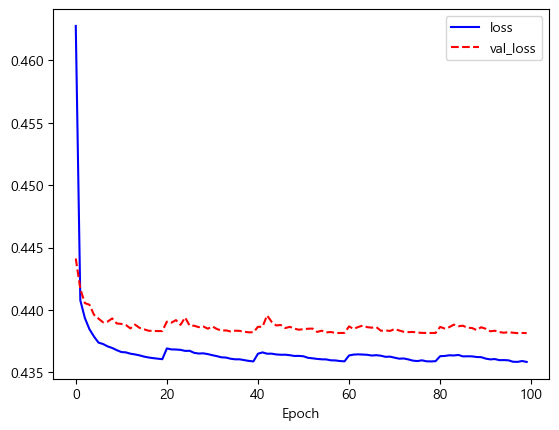

In [17]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

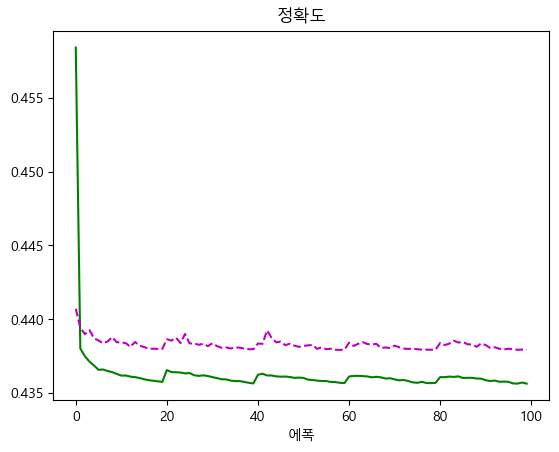

In [18]:

plt.plot(history.history['metric_fn'], 'g-', label='rmsle ')
plt.plot(history.history['val_metric_fn'], 'm--', label='rmsle_val')
plt.xlabel('에폭')
plt.title('정확도')
plt.show()


In [19]:
sample_submission = pd.read_csv('data/sample_submission.csv')

sample_submission["ECLO"] = test_preds

sample_submission.to_csv("result/1204_modify_fillna.csv", index=False)
sample_submission["ECLO"]

0        4.155869
1        3.678706
2        4.840918
3        4.309455
4        4.523291
           ...   
10958    5.315925
10959    4.381029
10960    4.625497
10961    4.470060
10962    4.415315
Name: ECLO, Length: 10963, dtype: float64

In [20]:
# !TODO
# 규제 값 변경해보기